# CIFAR10 이미지 분류 모델 구현(VGG16)

### [1] 데이터  로딩

In [71]:
# 모듈 로딩
import tensorflow as tf

In [72]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, UpSampling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from IPython.display import Image

In [73]:
(x_train,y_train), (x_test,y_test)=load_data()

### [2] 데이터 전처리

#### [2-1] 스케일링

In [74]:
x_train = x_train.reshape(-1,32,32,3)/255.0
x_test = x_test.reshape(-1,32,32,3)/255.0
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

#### [2-2] 데이터 나누기

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify=y_train)

### [3] 모델 생성

In [77]:
transfer_model = VGG16(weights='imagenet', include_top=False)

In [78]:
for layer in transfer_model.layers:
    layer.trainable = False

In [79]:
transfer_model.layers[-8:]

In [80]:
transfer_model.layers

In [81]:
for layer in transfer_model.layers[-8:]:
    layer.trainable = True

In [82]:
inputs = transfer_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(10, activation='softmax')(x)

In [83]:
model = tf.keras.models.Model(transfer_model.input, x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

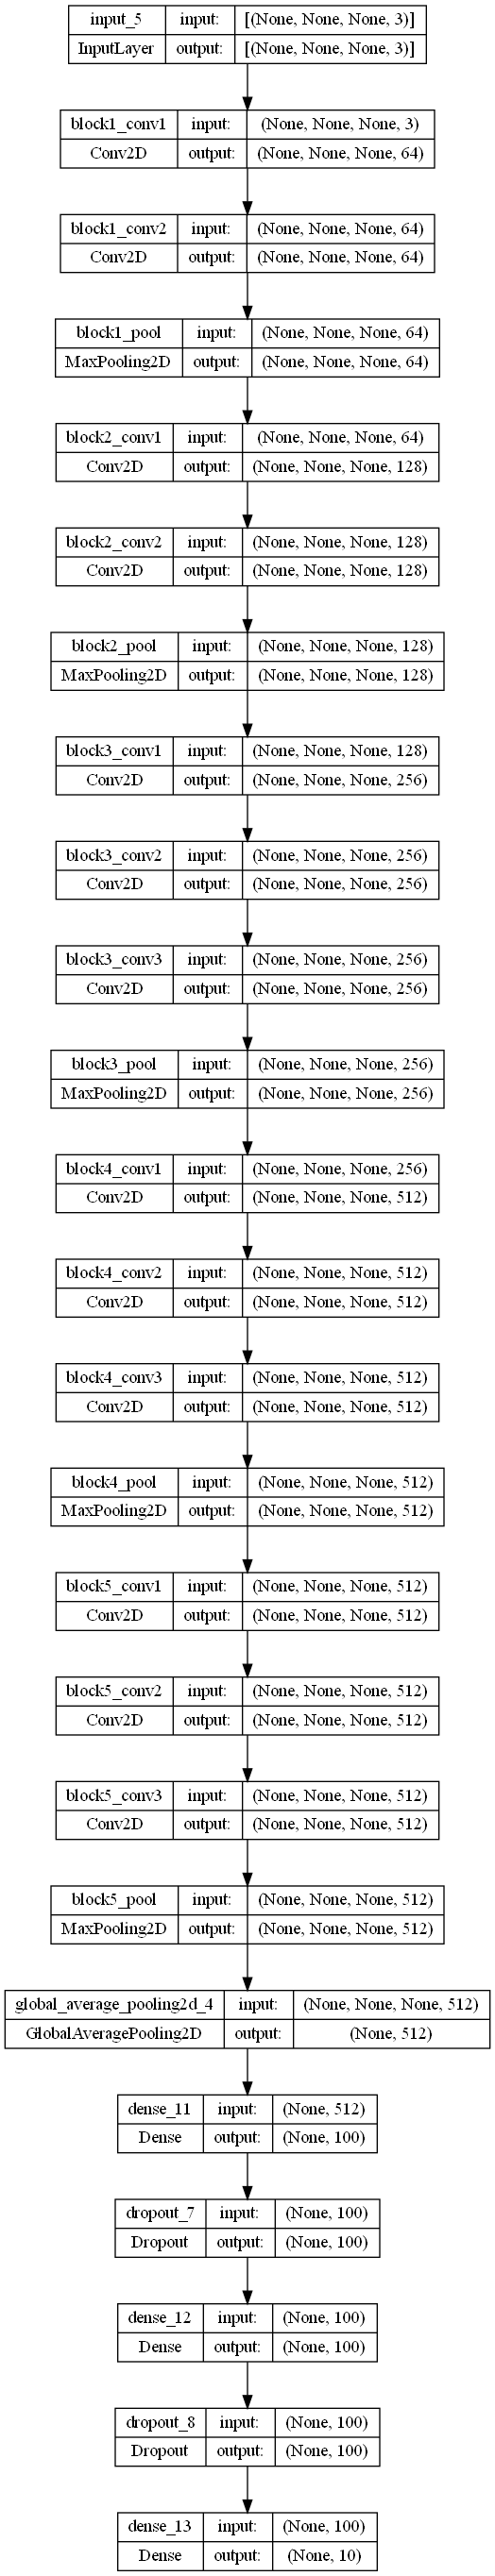

In [84]:
plot_model(model, show_shapes=True)

In [85]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### [4] 모델 학습

In [86]:
model.fit(x_train, y_train,epochs=10,validation_data=(x_val,y_val),validation_batch_size=50)

Epoch 1/10
1250/1250 [==============================] - 839s 670ms/step - loss: 1.6919 - accuracy: 0.3491 - val_loss: 1.3008 - val_accuracy: 0.5147
Epoch 2/10
1250/1250 [==============================] - 857s 686ms/step - loss: 1.1291 - accuracy: 0.6126 - val_loss: 0.9896 - val_accuracy: 0.6649
Epoch 3/10
1250/1250 [==============================] - 873s 698ms/step - loss: 0.9583 - accuracy: 0.6824 - val_loss: 0.8988 - val_accuracy: 0.7066
Epoch 4/10
1250/1250 [==============================] - 877s 702ms/step - loss: 0.8646 - accuracy: 0.7163 - val_loss: 1.0099 - val_accuracy: 0.6728
Epoch 5/10
1250/1250 [==============================] - 883s 706ms/step - loss: 0.7856 - accuracy: 0.7474 - val_loss: 0.8095 - val_accuracy: 0.7290
Epoch 6/10
1250/1250 [==============================] - 886s 709ms/step - loss: 0.7419 - accuracy: 0.7604 - val_loss: 0.7933 - val_accuracy: 0.7479
Epoch 7/10
1250/1250 [==============================] - 890s 712ms/step - loss: 0.7151 - accuracy: 0.7712 - val_

In [87]:
model.evaluate(x_val,y_val)

313/313 [==============================] - 43s 136ms/step - loss: 0.8098 - accuracy: 0.7547


[0.8097655773162842, 0.7547000050544739]

In [88]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 46s 146ms/step - loss: 0.8103 - accuracy: 0.7554


[0.8102849125862122, 0.7554000020027161]

### [5] 예측

- 0   airplane  
- 1   automobile  
- 2   bird  
- 3   cat  
- 4   deer  
- 5   dog  
- 6   frog  
- 7   horse  
- 8   ship  
- 9   truck  

In [89]:
pretest=model.predict(x_test[3].reshape(-1,32,32,3))

1/1 [==============================] - 0s 302ms/step


In [90]:
import PIL.Image as pilimg

In [102]:
image = pilimg.open('cat.jpg')
pix = np.array(image)

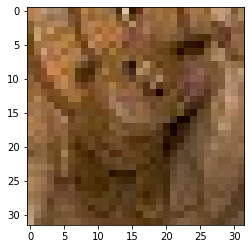

In [103]:
plt.imshow(pix)
plt.show()

In [104]:
np.round(model.predict((pix/255.0).reshape(-1,32,32,3)))

1/1 [==============================] - 0s 26ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [105]:
image1 = pilimg.open('airplane.jpg')
pix1 = np.array(image1)

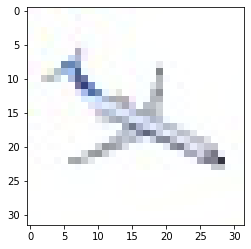

In [106]:
plt.imshow(pix1)
plt.show()

In [107]:
np.round(model.predict((pix1/255.0).reshape(-1,32,32,3)))

1/1 [==============================] - 0s 37ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [116]:
image2 = pilimg.open('dog.jpg')
pix2 = np.array(image2)

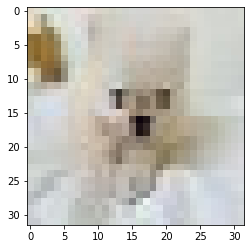

In [117]:
plt.imshow(pix2)
plt.show()

In [119]:
np.round(model.predict((pix2/255.0).reshape(-1,32,32,3)),2)

1/1 [==============================] - 0s 30ms/step


array([[0.  , 0.  , 0.05, 0.4 , 0.1 , 0.28, 0.03, 0.12, 0.  , 0.01]],
      dtype=float32)

In [120]:
image3 = pilimg.open('auto.jpg')
pix3 = np.array(image3)

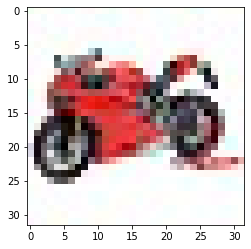

In [121]:
plt.imshow(pix3)
plt.show()

In [123]:
np.round(model.predict((pix3/255.0).reshape(-1,32,32,3)))

1/1 [==============================] - 0s 26ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)